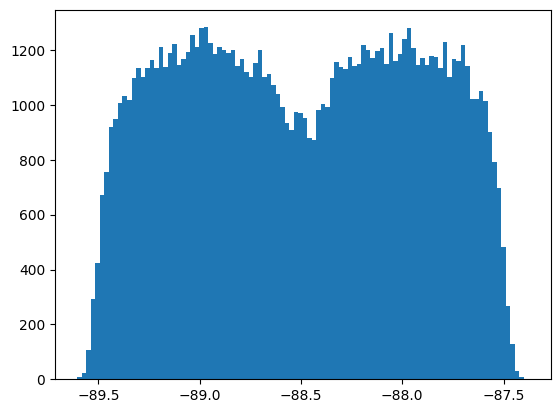

In [2]:
from sensitivities.stochastic import sample, Gaussian, Uniform, Discrete
import matplotlib.pyplot as plt
import numpy as np


def my_function(a, b, c=0, d=0):
    return a + b + c + d


samples = sample(
    my_function,
    [
        Gaussian(10, 0.05),
        Discrete([1, 2]),
    ],
    {"c": Uniform(-0.4, 0.4), "d": -100},
    n=100000,
    corr=[("a", "c", 1)],
)

plt.hist(np.array(samples), 100)
plt.show()

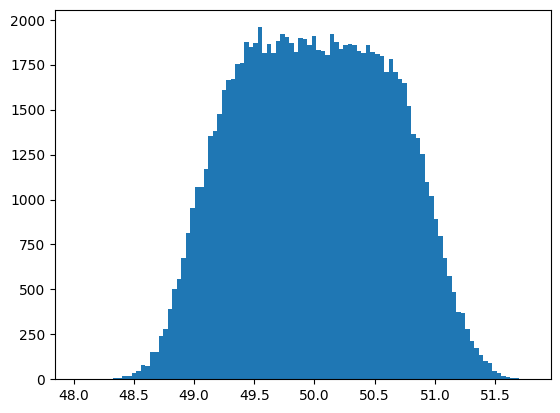

In [19]:
def calibrate_signal(signal, gain, offset):
    return (signal - offset) / gain


# monte carlo error propagation
samples = sample(
    calibrate_signal,
    [
        100,
        Gaussian(2, 0.01),  # gain uncertainty
        Uniform(-2, 2),  # offset uncertainty
    ],
    n=100000,
    corr=[("gain", "offset", 0)],
)

plt.hist(np.array(samples), 100)
plt.show()